In [ ]:
!pip install git+https://github.com/qubvel/efficientnet

In [ ]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import pandas as pd
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Lambda, MaxPooling2D, Dropout
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from efficientnet.keras import EfficientNetB0 as ENetB0
from keras_preprocessing.image import ImageDataGenerator
from scipy import pi


2.2.0


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
!unzip "/content/gdrive/My Drive/Project/train.zip" -d "./"

In [ ]:
!unzip "/content/gdrive/My Drive/Project/test.zip" -d "./"

In [ ]:
trainDF = pd.read_csv("/content/gdrive/My Drive/Project/train.txt", sep=" ", header=None)
trainDF.columns = ['Images', 'SteeringAngle'] 
trainDF['SteeringAngle'] = trainDF['SteeringAngle'] * (pi / 180)

testDF = pd.read_csv("/content/gdrive/My Drive/Project/test.txt", sep=" ", header=None)
testDF.columns = ['Images', 'SteeringAngle'] 

datagen = ImageDataGenerator(
            rescale=1./255,
            zca_whitening=True,
            rotation_range=5,
            zoom_range=[0.1, 0.5],
            height_shift_range=[0.1,0.3],
            brightness_range=[0.55,1.0],
            fill_mode='nearest',
            validation_split=0.25)

trainData = trainDF.shape[0] * 0.75
valData = trainDF.shape[0] * 0.25
# print(trainData, valData)

test_datagen = ImageDataGenerator(rescale=1./255)

BatchSize = 98

train_generator=datagen.flow_from_dataframe(
dataframe=trainDF,
directory="/content/train/",
x_col="Images",
y_col="SteeringAngle",
subset="training",
batch_size=BatchSize,
seed=42,
shuffle=False,
class_mode="raw",
target_size=(100,200))

validation_generator = datagen.flow_from_dataframe(
dataframe=trainDF,
directory="/content/train/",
x_col="Images",
y_col="SteeringAngle",
subset="validation",
batch_size=BatchSize,
seed=42,
shuffle=False,
class_mode="raw",
target_size=(100,200))


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 36455 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 0 validated image filenames.
Found 0 validated image filenames.


In [ ]:
def ENetB0_DA(width, height, depth):

    conv_base = ENetB0(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    model = models.Sequential()
    model.add(conv_base)
    conv_base.trainable = False
    model.add(layers.Flatten())

    model.add(Dense(1164, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))    
    model.add(Dense(1, activation='linear'))

    return model


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 4, 7, 1280)        4049564   
_________________________________________________________________
flatten_1 (Flatten)          (None, 35840)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1164)              41718924  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1164)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               116500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)               

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


279/279 [==============================] - 317s 1s/step - loss: 1.5830 - val_loss: 0.9004

Epoch 00001: saving model to /content/gdrive/My Drive/Project/ENetB0/ENetB0_DA/ENetB0_DA_weights.01-0.90.h5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


Epoch 2/10
279/279 [==============================] - 305s 1s/step - loss: 1.4063 - val_loss: 0.8617

Epoch 00002: saving model to /content/gdrive/My Drive/Project/ENetB0/ENetB0_DA/ENetB0_DA_weights.02-0.86.h5
Epoch 3/10
279/279 [==============================] - 302s 1s/step - loss: 1.2927 - val_loss: 0.9031

Epoch 00003: saving model to /content/gdrive/My Drive/Project/ENetB0/ENetB0_DA/ENetB0_DA_weights.03-0.90.h5
Epoch 4/10
279/279 [==============================] - 300s 1s/step - loss: 1.2197 - val_loss: 0.8106

Epoch 00004: saving model to /content/gdrive/My Drive/Project/ENetB0/ENetB0_DA/ENetB0_DA_weights.04-0.81.h5
Epoch 5/10
279/279 [==============================] - 299s 1s/step - loss: 1.1661 - val_loss: 0.7308

Epoch 00005: saving model to /content/gdrive/My Drive/Project/ENetB0/ENetB0_DA/ENetB0_DA_weights.05-0.73.h5
Epoch 6/10
279/279 [==============================] - 298s 1s/step - loss: 1.1014 - val_loss: 0.7715

Epoch 00006: saving model to /content/gdrive/My Drive/Proj

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


avg_train_loss: 1.182881643588398
avg_val_loss: 0.812069422006607
difference: 0.37081222158179095


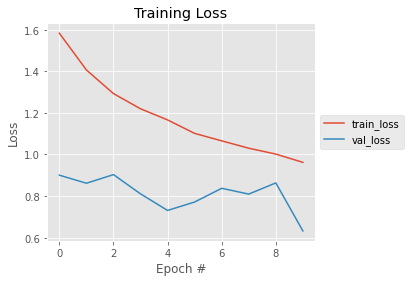

In [ ]:
from keras.callbacks import ModelCheckpoint

NUM_EPOCHS = 10

model = ENetB0_DA(width=200, height=100, depth=3)
print (model.summary())

model.compile(optimizer=tf.keras.optimizers.Adadelta(lr=1e-4), loss="mse")

filepath = "/content/gdrive/My Drive/Project/ENetB0/ENetB0_DA/ENetB0_DA_weights.{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, verbose=1)

history = model.fit(
                train_generator,
                steps_per_epoch=round(trainData/BatchSize),
                epochs=NUM_EPOCHS,
                validation_data=validation_generator,
                validation_steps=round(valData/BatchSize),
                callbacks=[checkpoint])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

avg_train_loss = sum(history.history["loss"])/NUM_EPOCHS
avg_val_loss = sum(history.history["val_loss"])/NUM_EPOCHS

print("avg_train_loss: " + str(avg_train_loss))
print("avg_val_loss: " + str(avg_val_loss))
print("difference: " + str(abs(avg_train_loss - avg_val_loss)))


In [ ]:
from keras.models import load_model
model = ENetB0_DA(width=200, height=100, depth=3)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testDF,
directory="/content/test/",
x_col="Images",
# y_col="SteeringAngle",
y_col=None,    
batch_size=100,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,200))

filepath = "/content/gdrive/My Drive/Project/ENetB0/ENetB0_DA/ENetB0_DA_weights.08-0.81.h5"

model.load_weights(filepath)


predictions = model.predict(test_generator)
print('Predictions: ', predictions.shape)

16809984/16804768 [==============================] - 2s 0us/step
Found 8951 validated image filenames.
Predictions:  (8951, 1)


In [ ]:
import pandas as pd

Images = testDF['Images']
preds = predictions
actual = testDF['SteeringAngle']

df_preds = pd.DataFrame(Images)
df_preds['Actual Steering Angle'] = (actual * (pi / 180))
df_preds['Predicted Steering Angle'] = preds
df_preds.rename(columns = {0:'Images'}, inplace = True) 

df_preds['MAE'] = 0

for i in range(len(df_preds)):
  df_preds.iloc[i, -1] = abs(df_preds.iloc[i, 1] - df_preds.iloc[i, 2])

mae_sum = 0
for i in range(len(df_preds)):
    mae_sum += df_preds.iloc[i, -1]
    
print("mae_sum: " + str(mae_sum))    
MAE = mae_sum / len(df_preds)
print("len(df_preds): " + str(len(df_preds)))
print("MAE: " + str(MAE))

mae_sum: 3684.223522663006
len(df_preds): 8951
MAE: 0.41159909760507274


In [ ]:
df_preds[8900:]

,Images,Actual Steering Angle,Predicted Steering Angle,MAE
8900,45356.jpg,0.100356,0.102794,0.002438
8901,45357.jpg,0.093201,0.365377,0.272176
8902,45358.jpg,0.089710,0.178326,0.088616
8903,45359.jpg,0.086219,0.181993,0.095774
8904,45360.jpg,0.080983,0.148175,0.067191
8905,45361.jpg,0.074002,-0.214174,0.288176
8906,45362.jpg,0.074002,0.029196,0.044806
8907,45363.jpg,0.066846,0.168766,0.101920
8908,45364.jpg,0.063355,-0.092558,0.155913
8909,45365.jpg,0.054629,0.169996,0.115367
